# NERD DOS DADOS - Machine Learning - Prevenção de Fraudes

<p> Conjunto de dados com mais de 80.000 registros<br>
Analise exploratória de variáveis categórias e numéricas<br>
Analise e tratamento de valores missing (nulos)<br>
Analise estatística de variáveis<br>
Tratamento de Dados<br>     
Engenharia de Atributos<br>    
Gráficos<br>
Outliers<br>
Normalização e Padronização de Dados<br>
Balanceamento da variável ALVO (TARGET)<br>    
OneHotEncoding<br>
Criação, treino e teste dos modelos preditivos com 3 algoritmos diferentes (Random Forest, Suport Vector Machine e KNN<br>
GridSearch para ajustes de hiperparametros automáticos e treino de mais de 1.000 modelos    
Analise dos pesos das melhores variáveis    

## Importante Pacotes e Carregando o Dataset

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Importação do arquivo de dados

#df_original=pd.read_csv("dados_coletados_20k.csv")
df_original=pd.read_csv("dados_coletados80k.csv")

#df_original = pd.read_csv("dados_coletados10k.csv")

# Analise Exploratória - Visão Geral
<br>
Aqui o objetivo desta analise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variaveis, 
tipo de dados e período dos dados coletados.

In [6]:
#Tamanho do conjunto de dados. xx.xxx linhas e xx variáveis
df_original.shape

(80143, 24)

In [8]:
#Visão geral do conjunto de dados
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),NaN,N,0.00,10,284.00,187861.70,1617.36,Sim
1,321990634715,31,M,3000.00,MA,20.00,28,2021-07-23,0,14000.00,16100.00,2,1,1,1,CASADO (A),NaN,N,0.00,26,771.00,16615.93,1239.98,Sim
2,321965373715,36,F,2100.00,SP,24.00,180,2021-04-01,149,60000.00,69000.00,4,1,0,1,CASADO (A),Nenhum,N,0.00,27,802.00,74443.40,1346.64,Sim
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),Nenhum,N,0.00,2,41.00,196812.41,22713.63,Nao
4,322098744715,21,F,4300.00,MG,22.00,100,2022-12-28,94,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),Ensino Médio,N,0.00,6,162.00,36114.39,900.80,Sim


In [10]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_original['Data_Contratacao']).dt.date.min()
fim = pd.to_datetime(df_original['Data_Contratacao']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2020-11-25 Até: 2023-02-22


In [12]:
# Verificando se há valores nulos (dados missing)
df_original.isnull().sum()

Contrato                                0
Idade                                   0
Sexo                                    0
Valor_Renda                             0
UF_Cliente                              0
Perc_Juros                              0
Prazo_Emprestimo                        0
Data_Contratacao                        0
Prazo_Restante                          0
VL_Emprestimo                           0
VL_Emprestimo_ComJuros                  0
QT_Total_Parcelas_Pagas                 0
QT_Total_Parcelas_Pagas_EmDia           0
QT_Total_Parcelas_Pagas_EmAtraso        0
Qt_Renegociacao                         0
Estado_Civil                            0
Escolaridade                        57298
Possui_Patrimonio                       0
VL_Patrimonio                           0
QT_Parcelas_Atraso                      0
QT_Dias_Atraso                      25795
Saldo_Devedor                           0
Total_Pago                              0
Possivel_Fraude                   

In [14]:
#Informações básicas sobre tipos de variáveis
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          80143 non-null  int64  
 1   Idade                             80143 non-null  int64  
 2   Sexo                              80143 non-null  object 
 3   Valor_Renda                       80143 non-null  float64
 4   UF_Cliente                        80143 non-null  object 
 5   Perc_Juros                        80143 non-null  float64
 6   Prazo_Emprestimo                  80143 non-null  int64  
 7   Data_Contratacao                  80143 non-null  object 
 8   Prazo_Restante                    80143 non-null  int64  
 9   VL_Emprestimo                     80143 non-null  float64
 10  VL_Emprestimo_ComJuros            80143 non-null  float64
 11  QT_Total_Parcelas_Pagas           80143 non-null  int64  
 12  QT_T

In [16]:
# Total de valores únicos de cada variável
# A variável CONTRATO é um valor único para cada registro, pois refere-se ao Contrato do Cliente
valores_unicos = []
for i in df_original.columns[0:24].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Contrato : 80143
Idade : 86
Sexo : 2
Valor_Renda : 4747
UF_Cliente : 27
Perc_Juros : 53
Prazo_Emprestimo : 60
Data_Contratacao : 751
Prazo_Restante : 93
VL_Emprestimo : 73
VL_Emprestimo_ComJuros : 73
QT_Total_Parcelas_Pagas : 50
QT_Total_Parcelas_Pagas_EmDia : 48
QT_Total_Parcelas_Pagas_EmAtraso : 32
Qt_Renegociacao : 15
Estado_Civil : 8
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 4
QT_Parcelas_Atraso : 35
QT_Dias_Atraso : 39
Saldo_Devedor : 64166
Total_Pago : 54074
Possivel_Fraude : 2


In [18]:
# Visualizando algumas medidas estatisticas.
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,54348.00,80143.00,80143.00
mean,322023695416.17,38.82,29308.62,19.49,102.33,93.28,72847.78,83774.94,10.71,5.24,2.34,1.30,1.45,10.65,475.26,78622.32,9687.98
std,44697010.94,12.53,2748166.27,3.56,62.32,70.64,87407.93,100519.12,9.31,6.21,3.97,1.27,355.10,10.43,269.79,102318.95,19090.62
min,321944855715.00,4.00,0.00,4.49,14.00,-18.00,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,321984967215.00,29.00,2050.00,18.00,55.00,36.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,0.00,284.00,12122.76,1052.16
50%,322024156715.00,37.00,3000.00,20.00,80.00,78.00,40000.00,46000.00,8.00,2.00,1.00,1.00,0.00,9.00,468.00,35489.36,3951.39
75%,322062662215.00,46.00,5000.00,21.00,170.00,156.00,100000.00,115000.00,18.00,7.00,3.00,2.00,0.00,20.00,708.00,117783.25,10886.24
max,322099706715.00,103.00,765000000.00,28.00,240.00,227.00,500000.00,575000.00,66.00,66.00,31.00,38.00,100000.00,34.00,1014.00,626261.27,465821.39


In [20]:
# Avaliando o maior e menor valor da variavel Valor_Renda
print('Maior Renda:', df_original['Valor_Renda'].max())
print('Menor Renda:', df_original['Valor_Renda'].min())

Maior Renda: 765000000.0
Menor Renda: 0.0


In [22]:
# Avaliando o maior e menor valor da variavel QT_Dias_Atraso
print('Maior quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].max())
print('Menor quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias atraso:  1014.0
Menor quantidade de dias atraso:  11.0


In [24]:
# Avaliando o maior e menor valor da variavel Prazo_Restante
print('Maior quantidade de dias restante: ', df_original['Prazo_Restante'].max())
print('Menor quantidade de dias restante: ', df_original['Prazo_Restante'].min())

Maior quantidade de dias restante:  227
Menor quantidade de dias restante:  -18


In [26]:
# Quantidade de dias em atraso
df_original.groupby(['QT_Dias_Atraso']).size()

QT_Dias_Atraso
11.00      3626
41.00      1572
71.00      1115
103.00     1028
133.00      860
162.00      914
194.00     1027
225.00     1330
251.00     1957
284.00     1956
315.00     1833
344.00     1986
376.00     2177
406.00     2024
435.00     1980
437.00        3
468.00     1977
498.00     1873
529.00     1750
559.00     1848
589.00     1840
617.00     1911
649.00     2036
680.00     1836
705.00        1
708.00     1936
736.00        3
741.00     2180
764.00        1
771.00     1952
802.00     1731
833.00     1471
862.00     1174
894.00     1061
924.00      988
953.00      962
981.00      427
1014.00       2
dtype: int64

In [28]:
# Prazo emprestimo
df_original.groupby(['Prazo_Emprestimo']).size()

Prazo_Emprestimo
14         1
15        46
16        19
17         1
18       104
19        21
20      1646
22         1
24         1
25      1749
28        42
29         5
30      2230
34         7
35      1588
36      3710
38        10
39         2
40      1671
42        99
43        13
45      1818
46         1
48      1857
49         9
50      3139
55      1687
58         1
60     10286
61         2
62         1
65       353
70      1271
75      1136
78        12
80      7241
85         9
88         2
90      1825
95       192
100    11720
120     1359
125        6
130      164
135       62
140      815
150      896
155       15
159        6
160      729
165       11
170      971
180     2104
190     5417
199       13
200    10246
210        1
230        8
235      144
240     1648
dtype: int64

In [30]:
# Prazo Restante
df_original.groupby(['Prazo_Restante']).size()

Prazo_Restante
-18       20
-15       25
-14       31
-13       17
-12       23
-11        3
-10      145
-8       120
-7       212
-6       305
-3        71
-2       635
-1        31
 0       448
 3       230
 4       497
 6       373
 7       637
 8       669
 9        99
 10      685
 11      531
 12      118
 13     1352
 15      389
 16      544
 17      646
 18      388
 19     1779
 20      625
 23      447
 25     1112
 27      387
 28      507
 29      848
 30      532
 31      391
 33     1046
 34     1696
 35     1085
 36      994
 37      589
 38     1368
 39      473
 40     1606
 41      461
 42      617
 43      747
 44      621
 45      561
 46      480
 49      669
 50      163
 51      511
 53      224
 59      122
 60     1127
 64     1689
 66      753
 68     1214
 71      360
 74      916
 75     1032
 76     1354
 77     1431
 78      438
 79     1790
 80     1858
 82     1457
 84     2054
 85     2514
 87      802
 89     2201
 91     1357
 94      702
 100     3

In [32]:
# Sexo
df_original.groupby(['Sexo']).size()

Sexo
F    31643
M    48500
dtype: int64

In [34]:
# UF dos Clientes
df_original.groupby(['UF_Cliente']).size()

UF_Cliente
AC       25
AL      867
AM       76
AP       23
BA     6709
CE     2050
DF      583
ES      312
GO     3860
MA     3593
MG    13718
MS     2120
MT      984
PA     3443
PB     1442
PE     2502
PI      731
PR     5794
RJ     2462
RN      759
RO       55
RR       15
RS     3500
SC     2555
SE      415
SP    21393
TO      157
dtype: int64

In [36]:
# Idade dos clientes
df_original.groupby(['Idade']).size()

Idade
4         2
6         1
7         1
8         1
9         1
10        1
17       12
18       60
19      424
20     1065
21     1533
22     1688
23     2059
24     2047
25     2310
26     2516
27     2431
28     2641
29     2652
30     2591
31     2512
32     2532
33     2429
34     2493
35     2577
36     2596
37     2333
38     2340
39     2301
40     2214
41     2325
42     2078
43     1997
44     2056
45     1831
46     1691
47     1503
48     1386
49     1366
50     1202
51     1293
52     1056
53     1060
54      977
55      934
56      825
57      781
58      772
59      733
60      716
61      558
62      533
63      470
64      418
65      364
66      379
67      308
68      312
69      332
70      285
71      226
72      148
73      210
74      112
75       93
76       95
77       63
78       59
79       37
80       46
81       33
82       30
83       24
84       19
85       11
86        9
87        5
88        7
89        3
90        3
91        1
92        1
94        

In [38]:
# Estado civil dos clientes
df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)                23576
DIVORCIADO                 3783
NENHUM                        4
OUTRO                      5912
SEPARADO JUDICIALMENTE        4
SOLTEIRO(A)               45205
UNIÃO ESTAVEL               501
VIÚVO(A)                   1158
dtype: int64

In [40]:
# Escolaridade dos clientes
df_original.groupby(['Escolaridade']).size()

Escolaridade
Ensino Fundamental                        126
Ensino Médio                              902
Ensino Superior                           600
Nenhum                                  21168
Pós Graduação / Mestrado / Doutorado       49
dtype: int64

In [42]:
# Patrimonio dos clientes
df_original.groupby(['Possui_Patrimonio']).size()

Possui_Patrimonio
N    79785
S      358
dtype: int64

In [44]:
# Valor do patrimonio dos clientes
df_original.groupby(['VL_Patrimonio']).size()

VL_Patrimonio
0.00         80135
1000.00          6
10000.00         1
100000.00        1
dtype: int64

In [46]:
# Variavel TARGET - ALVO
df_original.groupby(['Possivel_Fraude']).size()

Possivel_Fraude
Nao    35632
Sim    44511
dtype: int64

In [48]:
# Tratando os dados que identificamos que precisam ser ajustados em nossa analise acima

In [50]:
# Ajustando ESTADO_CIVIL
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')

df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)                24077
DIVORCIADO                 3783
OUTRO                      5916
SEPARADO JUDICIALMENTE        4
SOLTEIRO(A)               45205
VIÚVO(A)                   1158
dtype: int64

In [52]:
# Criando faixa etaria para utilizarmos no modelo preditivo
bins = [0, 21, 30, 40, 50, 60, 100]
labels = ['Até 21 Anos', 'De 22 até 30 Anos', 'De 31 até 40 Anos', 'De 41 até 50 Anos', 'De 51 até 60', 'Acima de 60 Anos']
df_original['Faixa_Etaria'] = pd.cut(df_original['Idade'], bins=bins, labels=labels)
df_original.groupby(['Faixa_Etaria']).size()

C:\Users\Darven Lima\AppData\Local\Temp\ipykernel_5576\2262884321.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_original.groupby(['Faixa_Etaria']).size()


Faixa_Etaria
Até 21 Anos           3101
De 22 até 30 Anos    20935
De 31 até 40 Anos    24327
De 41 até 50 Anos    17435
De 51 até 60          9147
Acima de 60 Anos      5197
dtype: int64

In [54]:
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,Faixa_Etaria
0,322090928715,42,M,4000.00,MA,17.00,140,2022-11-18,143,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),NaN,N,0.00,10,284.00,187861.70,1617.36,Sim,De 41 até 50 Anos
1,321990634715,31,M,3000.00,MA,20.00,28,2021-07-23,0,14000.00,16100.00,2,1,1,1,CASADO (A),NaN,N,0.00,26,771.00,16615.93,1239.98,Sim,De 31 até 40 Anos
2,321965373715,36,F,2100.00,SP,24.00,180,2021-04-01,149,60000.00,69000.00,4,1,0,1,CASADO (A),Nenhum,N,0.00,27,802.00,74443.40,1346.64,Sim,De 31 até 40 Anos
3,321967133715,28,M,2155.00,DF,19.00,190,2021-04-10,159,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),Nenhum,N,0.00,2,41.00,196812.41,22713.63,Nao,De 22 até 30 Anos
4,322098744715,21,F,4300.00,MG,22.00,100,2022-12-28,94,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),Ensino Médio,N,0.00,6,162.00,36114.39,900.80,Sim,Até 21 Anos


In [56]:
# Criando faixa salarial para utilizarmos no modelo preditivo
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k',
          'De 20k até 30k', 'Acima de 50k']
df_original['Faixa_Salarial'] = pd.cut(df_original['Valor_Renda'], bins=bins, labels=labels)
df_original.groupby(['Faixa_Salarial']).size()

C:\Users\Darven Lima\AppData\Local\Temp\ipykernel_5576\1630550584.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_original.groupby(['Faixa_Salarial']).size()


Faixa_Salarial
Até 1k              255
De 1k até 2k      19628
De 2k até 3k      21491
De 3k até 5k      21105
De 5k até 10k     11680
De 10k até 20k     3505
De 20k até 30k     1044
Acima de 50k       1435
dtype: int64

In [58]:
# Precisamos tratar os valores nulos dessa variavel antes de fazermos nossa engenharia de atributos
# Vamos preencher os valores nulos usando a mediana dos dados
df_original['QT_Dias_Atraso'].median()

468.0

In [60]:
# Preenchendo os valores nulo com a mediana
df_original['QT_Dias_Atraso'] = df_original['QT_Dias_Atraso'].fillna((df_original['QT_Dias_Atraso'].median()))

In [62]:
# Criando faixa de dias em atraso da cota para utilizarmos no modelo preditivo
bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']
df_original['Faixa_Dias_Atraso'] = pd.cut(df_original['QT_Dias_Atraso'], bins=bins, labels=labels)
df_original.groupby(['Faixa_Dias_Atraso']).size()

C:\Users\Darven Lima\AppData\Local\Temp\ipykernel_5576\2217046422.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_original.groupby(['Faixa_Dias_Atraso']).size()


Faixa_Dias_Atraso
Até 30 dias        3626
De 31 até 60       1572
De 61 até 90       1115
De 91 até 180      2802
De 181 até 240     2357
De 241 até 360     7732
Acima de 360      35829
dtype: int64

In [64]:
# Criando faixa de prazo de emprestimo para utilizarmos no modelo preditivo
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins=bins, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Emprestimo)

C:\Users\Darven Lima\AppData\Local\Temp\ipykernel_5576\626567821.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_original.Faixa_Prazo_Emprestimo)


Faixa_Prazo_Emprestimo
Até 60 Meses            31764
De 61 até 120 Meses     25123
De 121 até 200 Meses    21455
Acima de 200 Meses       1801
Name: count, dtype: int64

In [66]:
# Criando faixa de prazo restante do emprestimo para utilizarmos no modelo preditivo
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins=bins, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Restante)

C:\Users\Darven Lima\AppData\Local\Temp\ipykernel_5576\1503535162.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_original.Faixa_Prazo_Restante)


Faixa_Prazo_Restante
Até 60 Meses            29394
De 61 até 120 Meses     24752
De 121 até 200 Meses    15266
Acima de 200 Meses       9093
Name: count, dtype: int64

In [68]:
# Agora após os ajustes vamos visualizar de forma gráfica para avaliarmos melhor

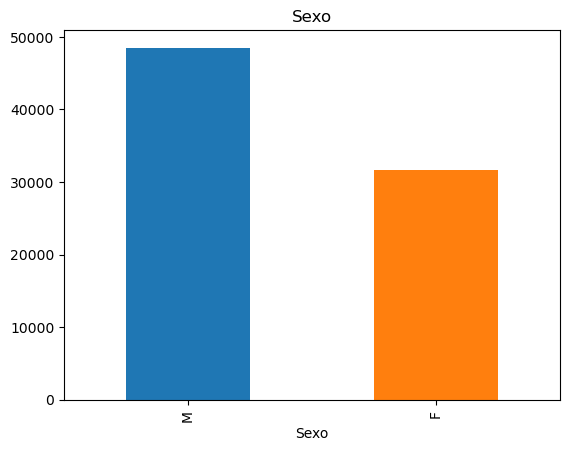

In [70]:
df_original.Sexo.value_counts().plot(kind='bar', title='Sexo',color = ['#1F77B4', '#FF7F0E']);

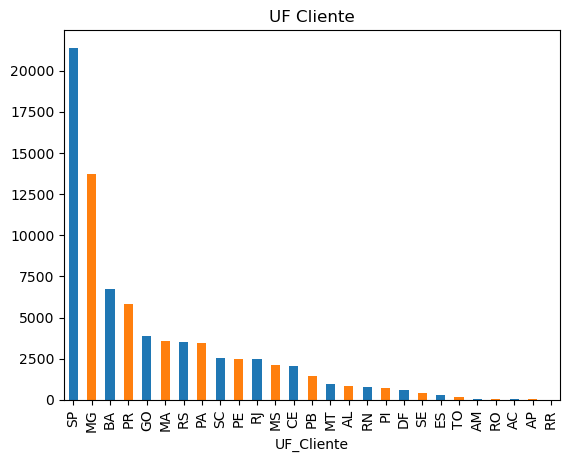

In [71]:
df_original.UF_Cliente.value_counts().plot(kind='bar', title='UF Cliente',color = ['#1F77B4', '#FF7F0E']);

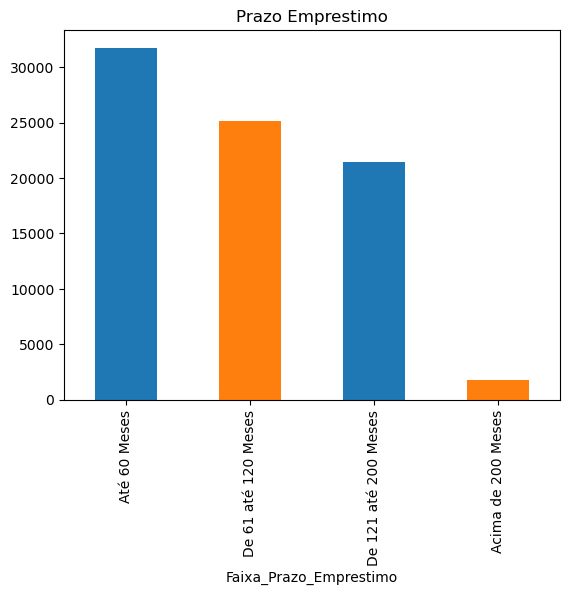

In [72]:
df_original.Faixa_Prazo_Emprestimo.value_counts().plot(kind='bar', title='Prazo Emprestimo',color = ['#1F77B4', '#FF7F0E']);

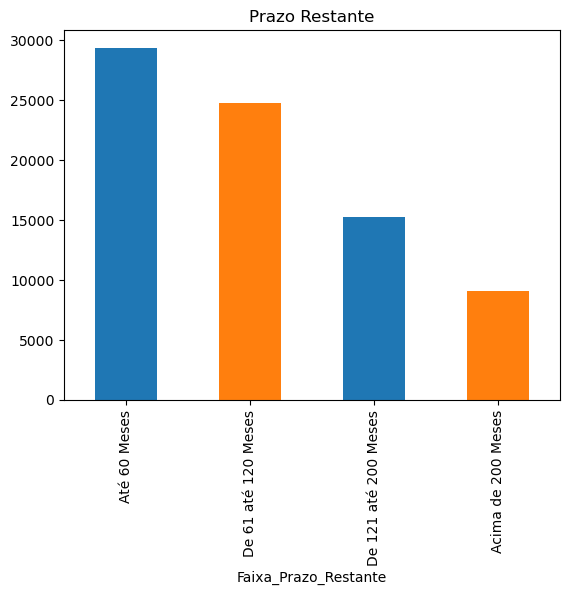

In [73]:
df_original.Faixa_Prazo_Restante.value_counts().plot(kind='bar', title='Prazo Restante',color = ['#1F77B4', '#FF7F0E']);

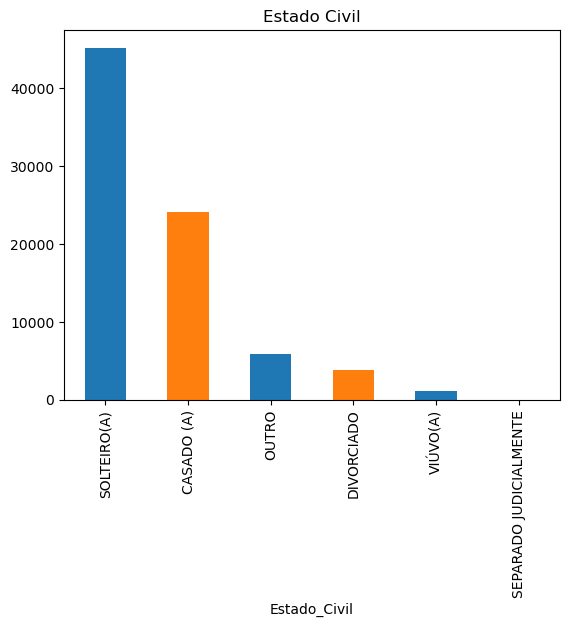

In [74]:
df_original.Estado_Civil.value_counts().plot(kind='bar', title='Estado Civil',color = ['#1F77B4', '#FF7F0E']);

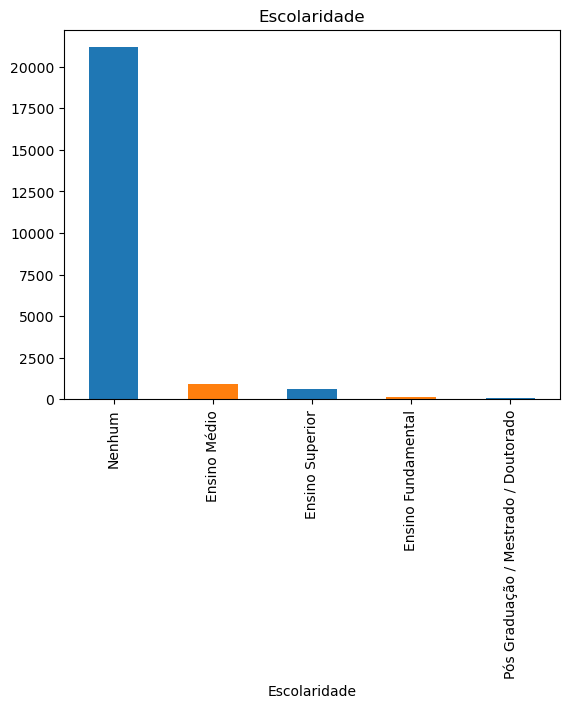

In [75]:
df_original.Escolaridade.value_counts().plot(kind='bar', title='Escolaridade',color = ['#1F77B4', '#FF7F0E']);

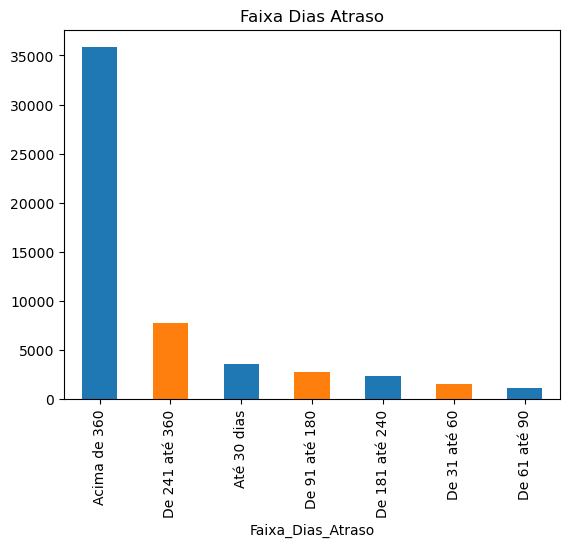

In [76]:
df_original.Faixa_Dias_Atraso.value_counts().plot(kind='bar', title='Faixa Dias Atraso',color = ['#1F77B4', '#FF7F0E']);

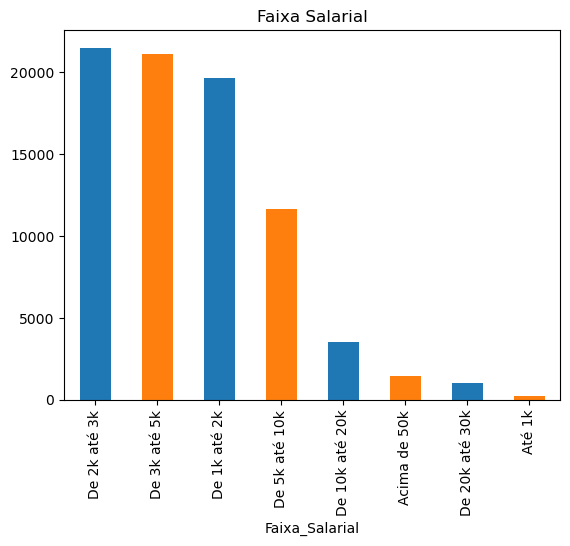

In [78]:
df_original.Faixa_Salarial.value_counts().plot(kind='bar', title='Faixa Salarial',color = ['#1F77B4', '#FF7F0E']);

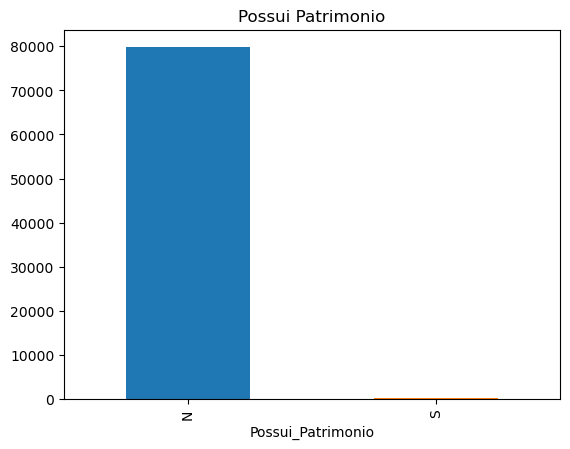

In [80]:
df_original.Possui_Patrimonio.value_counts().plot(kind='bar', title='Possui Patrimonio',color = ['#1F77B4', '#FF7F0E']);

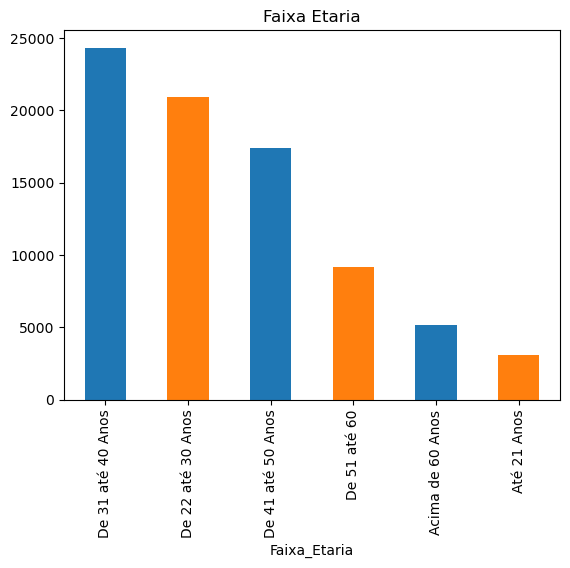

In [82]:
df_original.Faixa_Etaria.value_counts().plot(kind='bar', title='Faixa Etaria',color = ['#1F77B4', '#FF7F0E']);

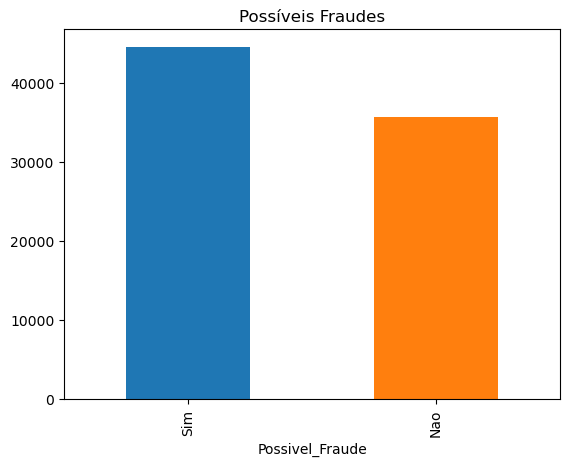

In [84]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais cotas como NÃO POSSÍVEL FRAUDE
#dessa forma, precisaremos balancear o dataset mais adiante.
df_original.Possivel_Fraude.value_counts().plot(kind='bar', title='Possíveis Fraudes',color = ['#1F77B4', '#FF7F0E']);

In [87]:
# Vamos visualizar novamente como está nosso DataFrame original após a engenharia de atributos
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          80143 non-null  int64   
 1   Idade                             80143 non-null  int64   
 2   Sexo                              80143 non-null  object  
 3   Valor_Renda                       80143 non-null  float64 
 4   UF_Cliente                        80143 non-null  object  
 5   Perc_Juros                        80143 non-null  float64 
 6   Prazo_Emprestimo                  80143 non-null  int64   
 7   Data_Contratacao                  80143 non-null  object  
 8   Prazo_Restante                    80143 non-null  int64   
 9   VL_Emprestimo                     80143 non-null  float64 
 10  VL_Emprestimo_ComJuros            80143 non-null  float64 
 11  QT_Total_Parcelas_Pagas           80143 non-null  int6

In [97]:
# Vamos selecionar as colunas que iremos utilizar e algumas iremos descartar
df_original.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

In [99]:
# APÓS ANALISE INICIAL QUE REALIZAMOS ACIMA, ENTENDEMOSO QUE ALGUMAS VARIÁVEIS NÃO POSSUEM RELEVANCIA.

#  Contrato --> Essa variável é a identificação de cada cliente
#  Data_Contratacao, VL_Patrimonio, Possui_Patrimonio, Escolaridade, Idade --> Essas não irão ter relevancia no modelo
#  Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante --> Essas variáveis já transformamos em categoria


# Chamaremos nosso novo conjunto de dados de df_dados

columns = ['Sexo', 'UF_Cliente', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']

df_dados = pd.DataFrame(df_original, columns=columns)

In [101]:
df_dados.shape

(80143, 19)

In [104]:
df_dados.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              80143 non-null  object  
 1   UF_Cliente                        80143 non-null  object  
 2   Perc_Juros                        80143 non-null  float64 
 3   VL_Emprestimo                     80143 non-null  float64 
 4   VL_Emprestimo_ComJuros            80143 non-null  float64 
 5   QT_Total_Parcelas_Pagas           80143 non-null  int64   
 6   QT_Total_Parcelas_Pagas_EmDia     80143 non-null  int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  80143 non-null  int64   
 8   Qt_Renegociacao                   80143 non-null  int64   
 9   Estado_Civil                      80143 non-null  object  
 10  QT_Parcelas_Atraso                80143 non-null  int64   
 11  Saldo_Devedor                     80143 non-null  floa

In [106]:
# Vamos constatar que realmente não há valores nulos
df_dados.isnull().sum()

Sexo                                    0
UF_Cliente                              0
Perc_Juros                              0
VL_Emprestimo                           0
VL_Emprestimo_ComJuros                  0
QT_Total_Parcelas_Pagas                 0
QT_Total_Parcelas_Pagas_EmDia           0
QT_Total_Parcelas_Pagas_EmAtraso        0
Qt_Renegociacao                         0
Estado_Civil                            0
QT_Parcelas_Atraso                      0
Saldo_Devedor                           0
Total_Pago                              0
Faixa_Prazo_Restante                 1638
Faixa_Salarial                          0
Faixa_Prazo_Emprestimo                  0
Faixa_Etaria                            1
Faixa_Dias_Atraso                   25110
Possivel_Fraude                         0
dtype: int64

# Analise Exploratória em Variáveis Categóricas
<br>
Nesta analise temos 2 objetivos:<br>
1 - Conhecer como a variável alvo (POSSIVEL_FRAUDE) está relacionada com as outras variáveis.<br>
2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

In [110]:
# Apenas para ajustar o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10.00, 4.00]
plt.rcParams["figure.autolayout"] = True

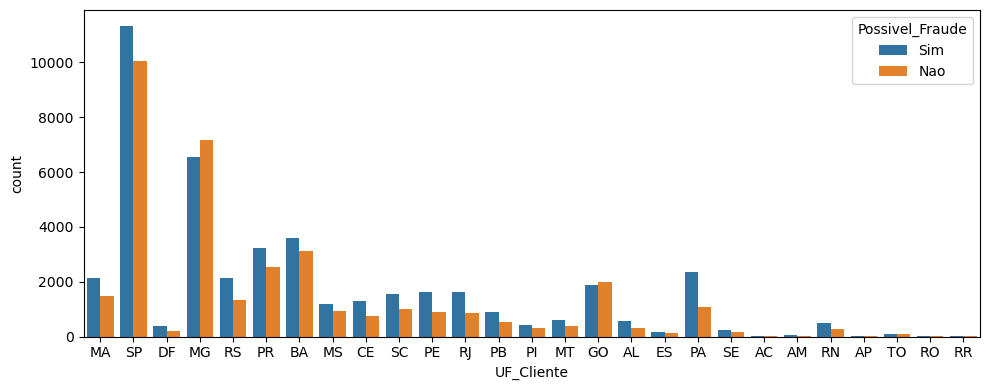

In [112]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

sns.countplot(data = df_dados, x = "UF_Cliente", hue = "Possivel_Fraude")
plt.show()

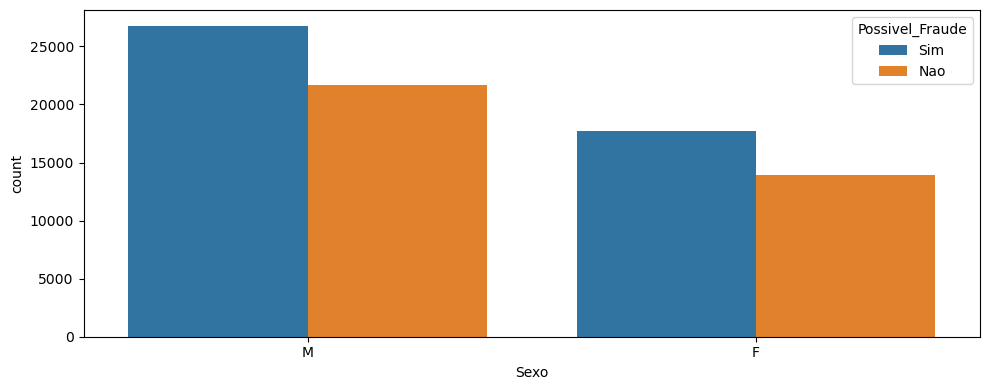

In [113]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

sns.countplot(data = df_dados, x = "Sexo", hue = "Possivel_Fraude")
plt.show()

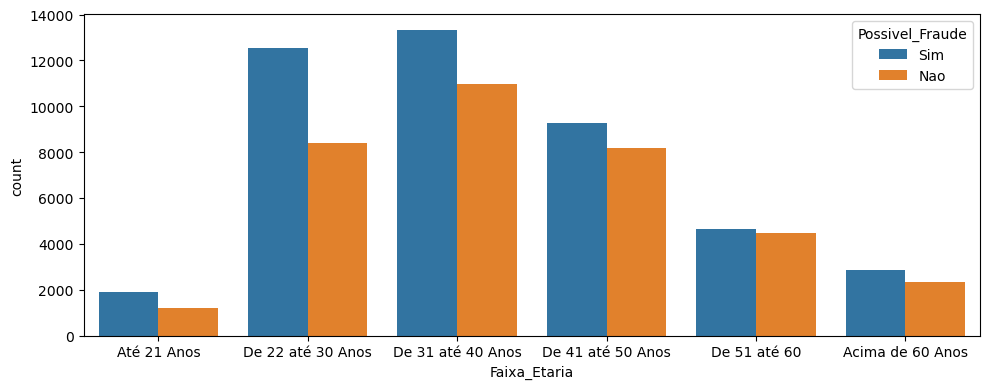

In [116]:
#Podemos constatar na analise que não há discrepancias nestas variaveis
sns.countplot(data = df_dados, x = "Faixa_Etaria", hue = "Possivel_Fraude")
plt.show()

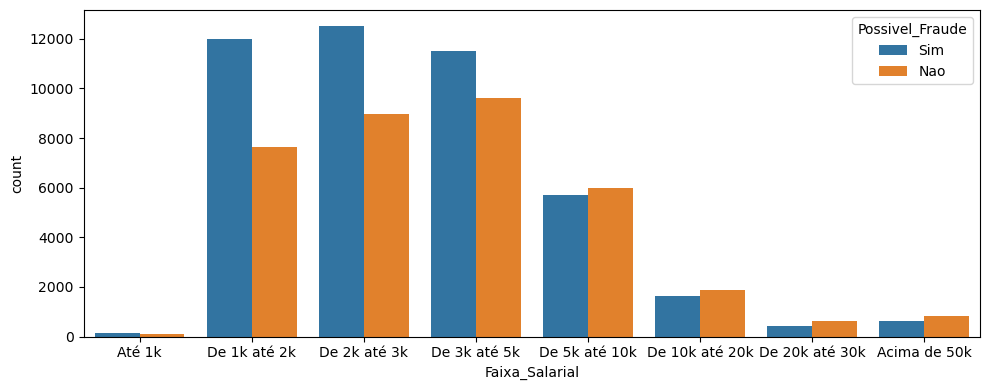

In [117]:
#Podemos constatar na analise que não há discrepancias nestas variaveis
sns.countplot(data = df_dados, x = "Faixa_Salarial", hue = "Possivel_Fraude")
plt.show()

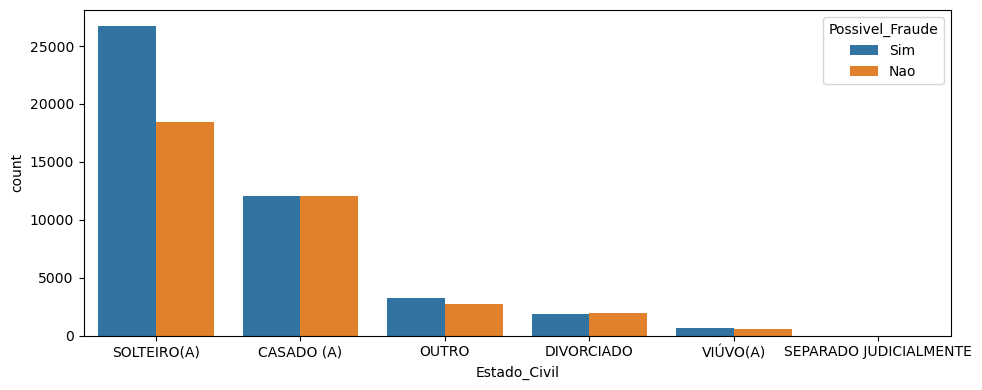

In [119]:
#Neste caso como há muitos casos de ESTADO CIVIL diferente de Casado(C) e Solteiro(S), iremos fazer um tratamento mais adiante
#para todos casos que não forem Casado e Solteiro, serão considerado como OUTROS. Dessa forma teremos somente 3 categorias
#e os dados ficarão balanceados sem discrepancias.

sns.countplot(data = df_dados, x = "Estado_Civil", hue = "Possivel_Fraude")
plt.show()

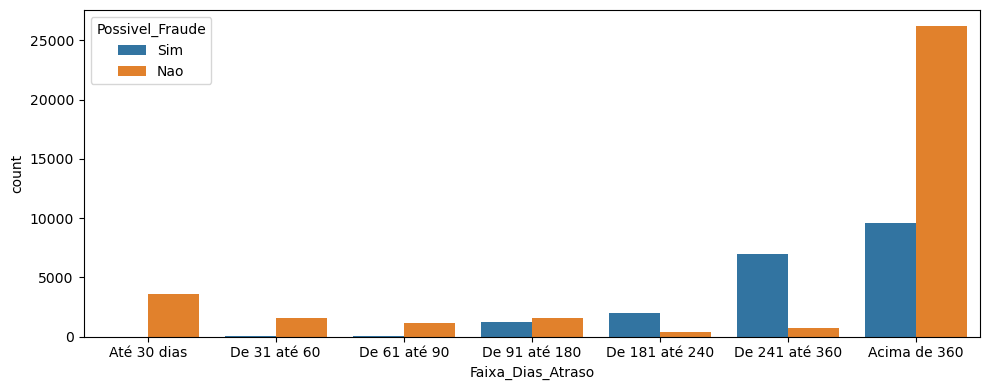

In [120]:
#Podemos observar o volume de cotas que geraram prejuízo na arrecadação de taxa de administracao
#Essa variável iremos manter no modelo e avaliar mais adiante
sns.countplot(data = df_dados, x = "Faixa_Dias_Atraso", hue = "Possivel_Fraude")
plt.show()

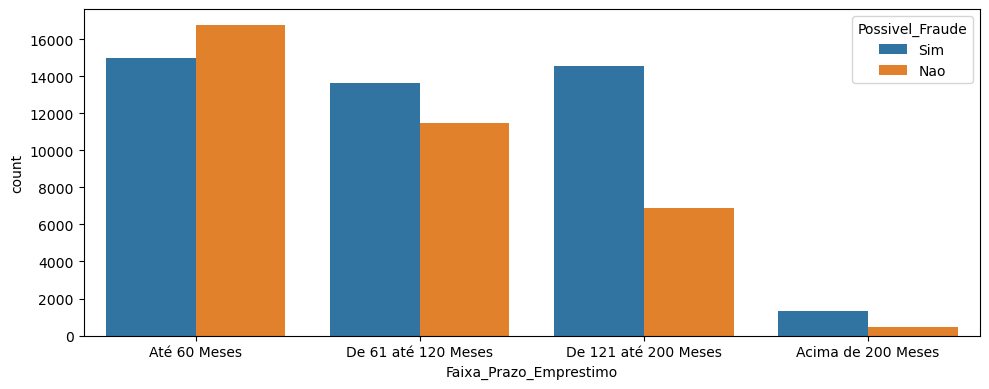

In [122]:
# Aqui podemos observar que não há discrepancias nestas variaveis.
sns.countplot(data = df_dados, x = "Faixa_Prazo_Emprestimo", hue = "Possivel_Fraude")
plt.show()

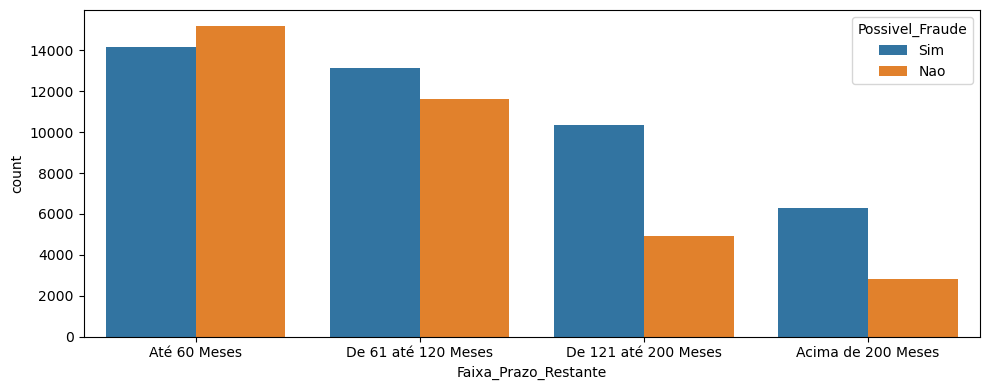

In [123]:
# Podemos observar que esta variável está muito desbalanceada, mas iremos avaliar melhor mais adiante.
sns.countplot(data = df_dados, x = "Faixa_Prazo_Restante", hue = "Possivel_Fraude")
plt.show()

In [126]:
df_dados.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00,80143.00
mean,19.49,72847.78,83774.94,10.71,5.24,2.34,1.30,10.65,78622.32,9687.98
std,3.56,87407.93,100519.12,9.31,6.21,3.97,1.27,10.43,102318.95,19090.62
min,4.49,3000.00,3450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,15000.00,17250.00,2.00,1.00,0.00,0.00,0.00,12122.76,1052.16
50%,20.00,40000.00,46000.00,8.00,2.00,1.00,1.00,9.00,35489.36,3951.39
75%,21.00,100000.00,115000.00,18.00,7.00,3.00,2.00,20.00,117783.25,10886.24
max,28.00,500000.00,575000.00,66.00,66.00,31.00,38.00,34.00,626261.27,465821.39


In [128]:
# Total de valores únicos de cada variável do novo dataset
valores_unicos = []
for i in df_dados.columns[0:19].tolist():
    print(i, ':', len(df_dados[i].astype(str).value_counts()))
    valores_unicos.append(len(df_dados[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 53
VL_Emprestimo : 73
VL_Emprestimo_ComJuros : 73
QT_Total_Parcelas_Pagas : 50
QT_Total_Parcelas_Pagas_EmDia : 48
QT_Total_Parcelas_Pagas_EmAtraso : 32
Qt_Renegociacao : 15
Estado_Civil : 6
QT_Parcelas_Atraso : 35
Saldo_Devedor : 64166
Total_Pago : 54074
Faixa_Prazo_Restante : 5
Faixa_Salarial : 8
Faixa_Prazo_Emprestimo : 4
Faixa_Etaria : 7
Faixa_Dias_Atraso : 8
Possivel_Fraude : 2


# Analise Exploratória - Variáveis Numéricas

<br>
Nesta analise temos diversos objetivos:<br>
1 - Conhecer as variáveis.<br>
2 - Realizar uma analise estatistica nas variáveis para futuros tratamentos. Iremos avaliar média, mediana, moda, desvio padrão
correlações, outliers, distribuição dos dados, etc.  

In [132]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_dados.columns[0:19].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)    

In [133]:
#Visualizando as variáveis numéricas
variaveis_numericas

['Perc_Juros',
 'VL_Emprestimo',
 'VL_Emprestimo_ComJuros',
 'QT_Total_Parcelas_Pagas',
 'QT_Total_Parcelas_Pagas_EmDia',
 'QT_Total_Parcelas_Pagas_EmAtraso',
 'Qt_Renegociacao',
 'QT_Parcelas_Atraso',
 'Saldo_Devedor',
 'Total_Pago']

In [137]:
#Quantidade de variaveis
len(variaveis_numericas)

10

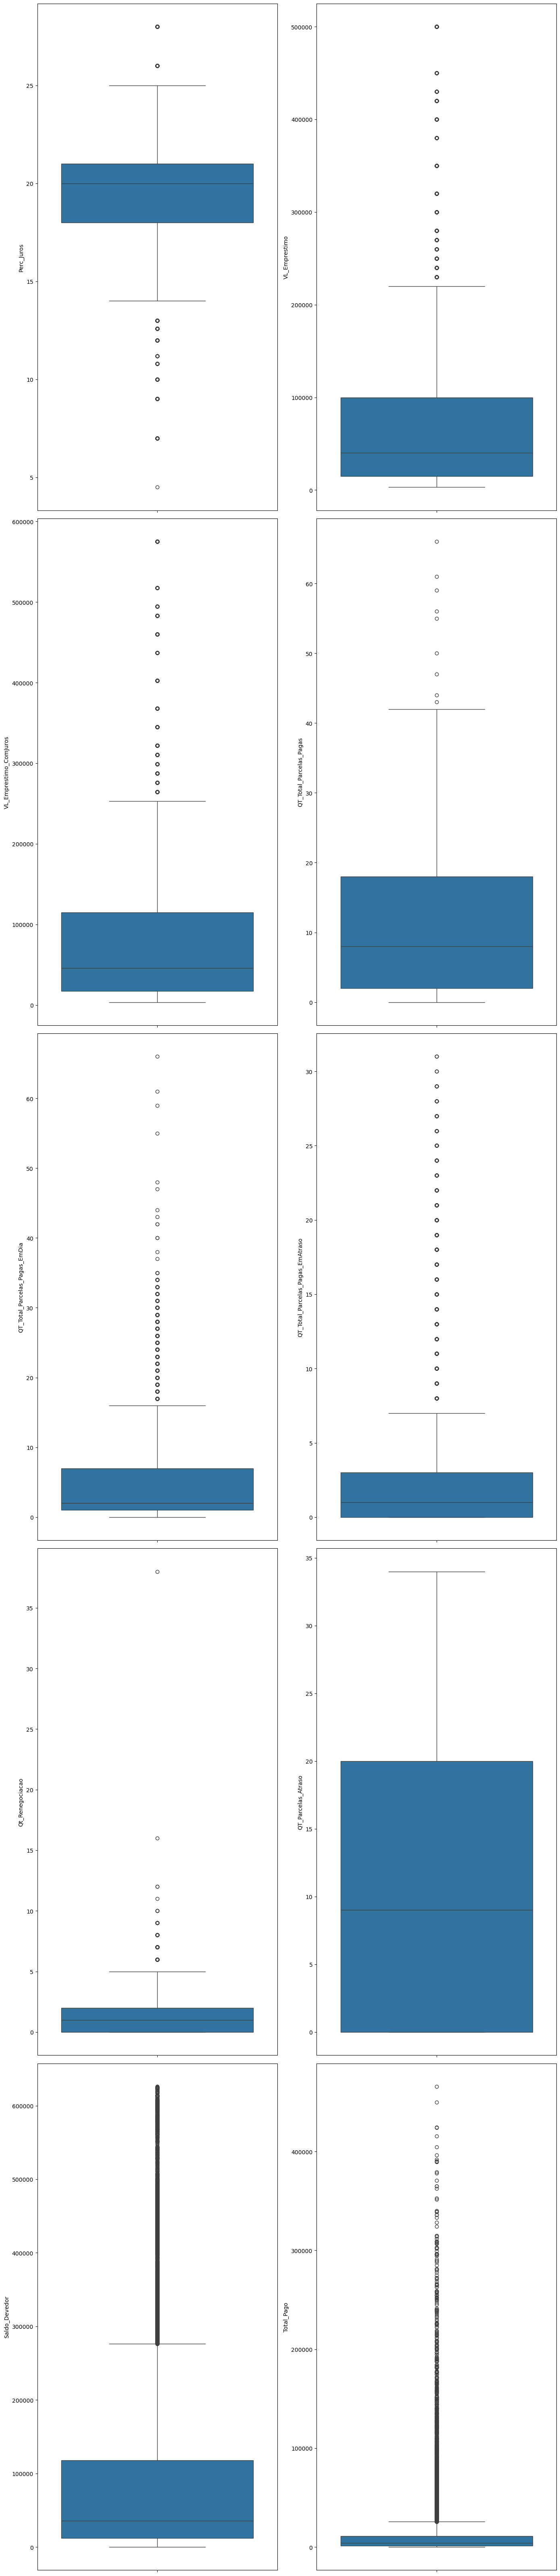

In [139]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 64.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2) #5 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [140]:
# carregar variaveis categoricas para OneHotEncoding
# Vamos colocar o slice somente até a coluna de indice 18 para não pegar a variável target.
variaveis_categoricas = []
for i in df_dados.columns[0:18].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i)    

In [143]:
# Visualizando as variaveis categoricas
variaveis_categoricas

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Prazo_Restante',
 'Faixa_Salarial',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Etaria',
 'Faixa_Dias_Atraso']

In [145]:
df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,M,MA,17.00,160000.00,184000.00,2,1,1,2,SOLTEIRO(A),10,187861.70,1617.36,De 121 até 200 Meses,De 3k até 5k,De 121 até 200 Meses,De 41 até 50 Anos,De 241 até 360,Sim
1,M,MA,20.00,14000.00,16100.00,2,1,1,1,CASADO (A),26,16615.93,1239.98,Até 60 Meses,De 2k até 3k,Até 60 Meses,De 31 até 40 Anos,NaN,Sim
2,F,SP,24.00,60000.00,69000.00,4,1,0,1,CASADO (A),27,74443.40,1346.64,De 121 até 200 Meses,De 2k até 3k,De 121 até 200 Meses,De 31 até 40 Anos,NaN,Sim
3,M,DF,19.00,180000.00,207000.00,29,28,0,2,SOLTEIRO(A),2,196812.41,22713.63,De 121 até 200 Meses,De 2k até 3k,De 121 até 200 Meses,De 22 até 30 Anos,De 31 até 60,Nao
4,F,MG,22.00,30000.00,34500.00,4,3,0,1,SOLTEIRO(A),6,36114.39,900.80,De 61 até 120 Meses,De 3k até 5k,De 61 até 120 Meses,Até 21 Anos,De 91 até 180,Sim


In [147]:
# Cria o encoder e aplica OneHotEncoder
lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [149]:
# Verifica novamente para confirmar se após transformação surgiu algum valor nulo
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

In [151]:
df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,9,17.00,160000.00,184000.00,2,1,1,2,4,10,187861.70,1617.36,2,6,2,4,3,Sim
1,1,9,20.00,14000.00,16100.00,2,1,1,1,0,26,16615.93,1239.98,1,5,1,3,7,Sim
2,0,25,24.00,60000.00,69000.00,4,1,0,1,0,27,74443.40,1346.64,2,5,2,3,7,Sim
3,1,6,19.00,180000.00,207000.00,29,28,0,2,4,2,196812.41,22713.63,2,5,2,2,4,Nao
4,0,10,22.00,30000.00,34500.00,4,3,0,1,4,6,36114.39,900.80,3,6,3,1,6,Sim


In [153]:
# Visualizando os tipos das variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80143 entries, 0 to 80142
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              80143 non-null  int32  
 1   UF_Cliente                        80143 non-null  int32  
 2   Perc_Juros                        80143 non-null  float64
 3   VL_Emprestimo                     80143 non-null  float64
 4   VL_Emprestimo_ComJuros            80143 non-null  float64
 5   QT_Total_Parcelas_Pagas           80143 non-null  int64  
 6   QT_Total_Parcelas_Pagas_EmDia     80143 non-null  int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  80143 non-null  int64  
 8   Qt_Renegociacao                   80143 non-null  int64  
 9   Estado_Civil                      80143 non-null  int32  
 10  QT_Parcelas_Atraso                80143 non-null  int64  
 11  Saldo_Devedor                     80143 non-null  float64
 12  Tota

In [155]:
# Visualiznado a quantidade da variavel target para balanceamento
variavel_target = df_dados.Possivel_Fraude.value_counts()
variavel_target

Possivel_Fraude
Sim    44511
Nao    35632
Name: count, dtype: int64

In [157]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados.iloc[:, 0:18]  
TARGET = df_dados.iloc[:, 18] 

In [159]:
# Visualizando as variaveis preditoras
PREDITORAS.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
0,1,9,17.00,160000.00,184000.00,2,1,1,2,4,10,187861.70,1617.36,2,6,2,4,3
1,1,9,20.00,14000.00,16100.00,2,1,1,1,0,26,16615.93,1239.98,1,5,1,3,7
2,0,25,24.00,60000.00,69000.00,4,1,0,1,0,27,74443.40,1346.64,2,5,2,3,7
3,1,6,19.00,180000.00,207000.00,29,28,0,2,4,2,196812.41,22713.63,2,5,2,2,4
4,0,10,22.00,30000.00,34500.00,4,3,0,1,4,6,36114.39,900.80,3,6,3,1,6


In [161]:
# Visualizando a variavel target
TARGET.head()

0    Sim
1    Sim
2    Sim
3    Nao
4    Sim
Name: Possivel_Fraude, dtype: object

In [163]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

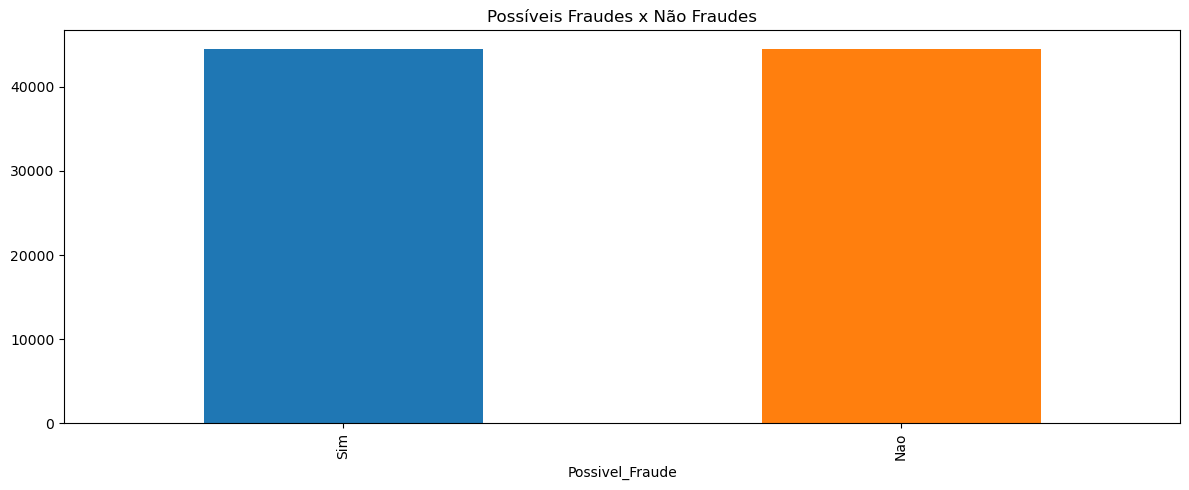

In [164]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='Possíveis Fraudes x Não Fraudes',color = ['#1F77B4', '#FF7F0E']);

In [165]:
# Quantidade de registros antes do balanceamento
PREDITORAS.shape

(80143, 18)

In [166]:
# Quantidade de registros antes do balanceamento
TARGET.shape

(80143,)

In [168]:
# Quantidade de registros após do balanceamento
PREDITORAS_RES.shape

(89022, 18)

In [173]:
# Quantidade de registros após do balanceamento
TARGET_RES.shape

(89022,)

In [176]:
## Agora vamos dividir os dados em dados de treino e teste para iniciarmos a etapa de criação do modelo

In [178]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [180]:
X_treino.shape

(62315, 18)

In [182]:
X_treino.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
16809,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,6,3,3,0
23947,0,8,18.00,35000.00,40250.00,11,2,5,3,0,0,21326.39,20918.17,1,6,1,4,0
41308,1,9,15.00,120000.00,138000.00,25,5,15,1,0,0,114343.23,26417.30,2,2,2,4,0
85127,1,11,14.00,50000.00,57500.00,25,10,1,2,5,0,20868.40,37837.90,1,0,1,0,0
79022,0,10,22.00,150000.00,172500.00,25,0,20,3,4,0,169283.63,16345.39,2,6,2,3,0


In [184]:
# Normalização das Variáveis
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [186]:
X_treino_normalizados.shape

(62315, 18)

In [188]:
# Visualizando os dados NORMALIZADOS
X_treino_normalizados

array([[1.        , 0.15384615, 0.52380952, ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.30769231, 0.52380952, ..., 0.33333333, 0.66666667,
        0.        ],
       [1.        , 0.34615385, 0.38095238, ..., 0.66666667, 0.66666667,
        0.        ],
       ...,
       [1.        , 0.96153846, 0.52380952, ..., 0.66666667, 0.5       ,
        1.        ],
       [1.        , 0.19230769, 0.52380952, ..., 1.        , 0.66666667,
        0.        ],
       [0.        , 0.15384615, 0.61904762, ..., 0.66666667, 0.33333333,
        1.        ]])

In [191]:
# Padronizacao das Variáveis
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

In [193]:
# Visualizando os dados PADRONIZADOS
X_treino_padronizados

array([[ 0.84452433, -1.53145018, -0.40217896, ...,  1.29206431,
         0.09190767, -0.88774635],
       [-1.18409851, -0.99431095, -0.40217896, ..., -0.97807377,
         0.87742768, -0.88774635],
       [ 0.84452433, -0.86002615, -1.23927589, ...,  0.15699527,
         0.87742768, -0.88774635],
       ...,
       [ 0.84452433,  1.28853077, -0.40217896, ...,  0.15699527,
         0.09190767,  1.40392291],
       [ 0.84452433, -1.39716537, -0.40217896, ...,  1.29206431,
         0.87742768, -0.88774635],
       [-1.18409851, -1.53145018,  0.15588566, ...,  0.15699527,
        -0.69361234,  1.40392291]])

# Criando, Treinando e Avaliando os Modelos de Machine Learning

## Primeiro iremos fazer com o Random Forest

In [197]:
# Construtor do Modelo
randomForest = RandomForestClassifier()

In [199]:
# Parametros default
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [220]:
# Valores para o grid de hiperparametros
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])


# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Criando o modelo com o Grid de Hiperparametros
randomForest = GridSearchCV(randomForest, param_grid, cv = 3)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

ValueError: Invalid parameter 'criterion' for estimator GridSearchCV(estimator=GridSearchCV(estimator=GridSearchCV(estimator=GridSearchCV(cv=3,
                                                                                  estimator=GridSearchCV(cv=3,
                                                                                                         estimator=GridSearchCV(cv=3,
                                                                                                                                estimator=RandomForestClassifier(),
                                                                                                                                param_grid={'criterion': array(['gini', 'entropy'], dtype='<U7'),
                                                                                                                                            'max_depth': array([10, 20]),
                                                                                                                                            'max_features': array(['sqrt', 'log2', None], dtype=object),
                                                                                                                                            'min_samples_leaf': array([1...
                                                                                                                    80,
                                                                                                                    100,
                                                                                                                    200]}),
                                    param_grid={'randomforestclassifier__criterion': ('gini',
                                                                                      'entropy'),
                                                'randomforestclassifier__max_depth': [5,
                                                                                      10,
                                                                                      20,
                                                                                      30,
                                                                                      50,
                                                                                      100,
                                                                                      1000,
                                                                                      2000],
                                                'randomforestclassifier__min_samples_leaf': [1,
                                                                                             2,
                                                                                             4,
                                                                                             8,
                                                                                             20,
                                                                                             40,
                                                                                             80,
                                                                                             100,
                                                                                             200]}),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]}). Valid parameters are: ['cv', 'error_score', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'].

In [214]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 20, 
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 1, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)
clf

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_jobs=8)

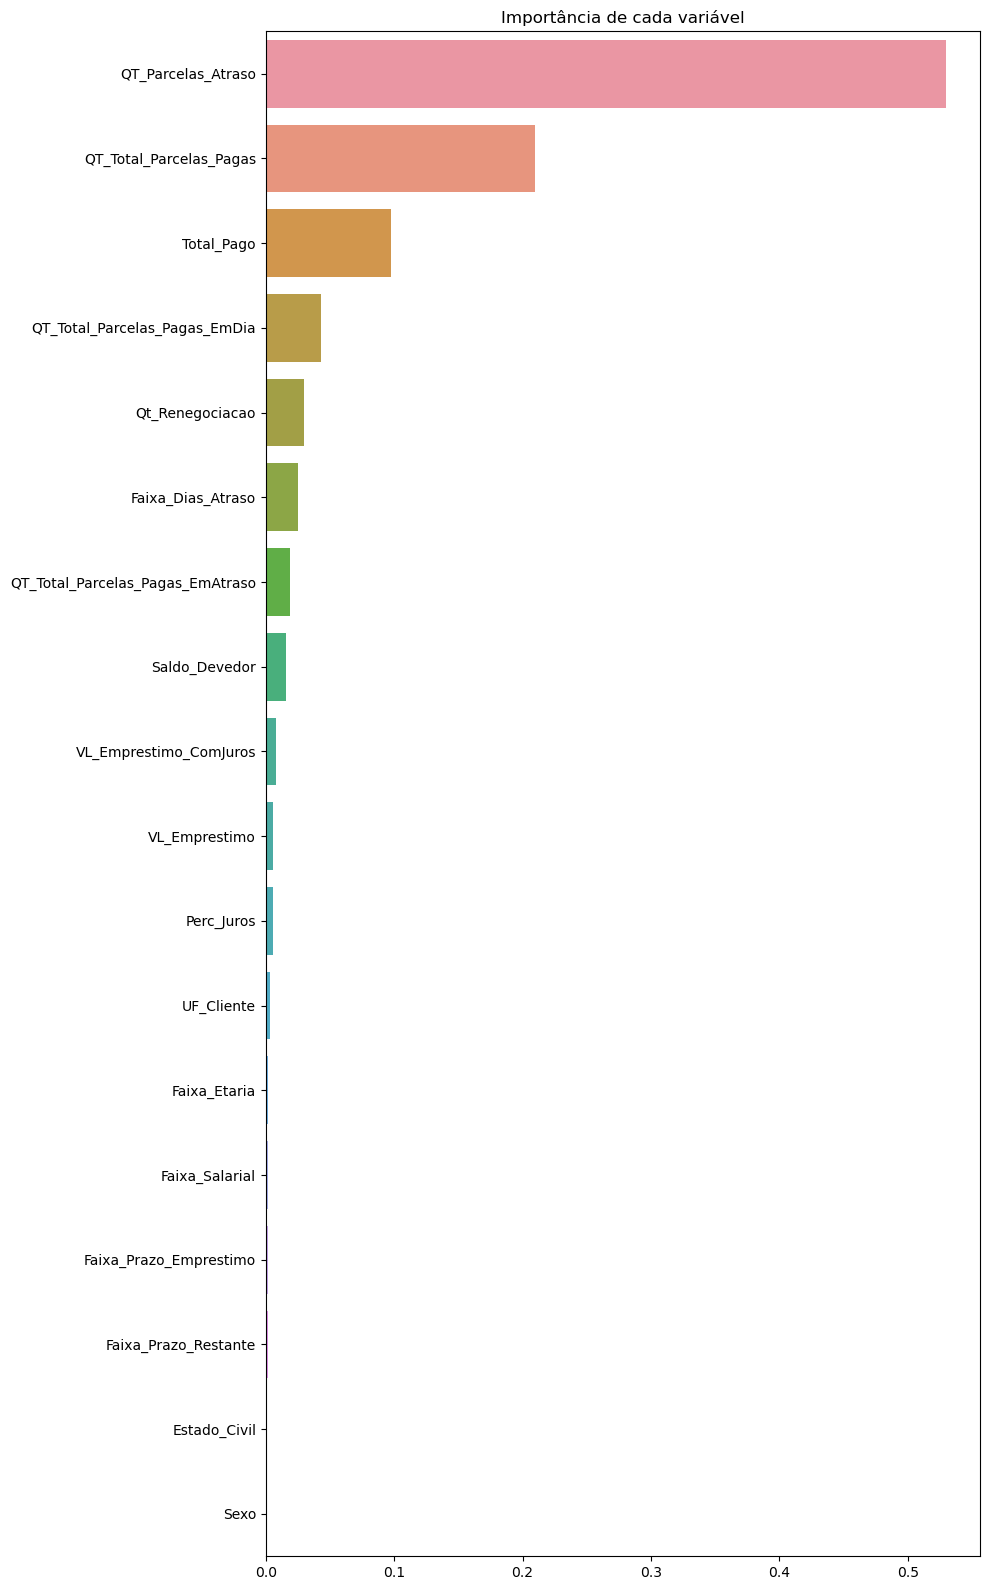

In [96]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [97]:
# Visualizando o percentual de importancia de cada variável
importances.sort_values(ascending = False)

QT_Parcelas_Atraso                 0.53
QT_Total_Parcelas_Pagas            0.21
Total_Pago                         0.10
QT_Total_Parcelas_Pagas_EmDia      0.04
Qt_Renegociacao                    0.03
Faixa_Dias_Atraso                  0.03
QT_Total_Parcelas_Pagas_EmAtraso   0.02
Saldo_Devedor                      0.02
VL_Emprestimo_ComJuros             0.01
VL_Emprestimo                      0.01
Perc_Juros                         0.01
UF_Cliente                         0.00
Faixa_Etaria                       0.00
Faixa_Salarial                     0.00
Faixa_Prazo_Emprestimo             0.00
Faixa_Prazo_Restante               0.00
Estado_Civil                       0.00
Sexo                               0.00
dtype: float64

In [98]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_treino_normalizados,Y_treino)
scores

1.0

In [99]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_teste_normalizados,Y_teste)
scores

0.9897384971863621

In [100]:
# Dicionário de métricas e metadados
modelo_rf = {'Melhores Hiperparametros':randomForest.best_params_,
               'Numero de Modelos Treinados': treinos_rf.shape[0],  
               'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

In [101]:
modelo_rf

{'Melhores Hiperparametros': {'criterion': 'entropy',
  'max_depth': 20,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 1,
  'n_estimators': 100},
 'Numero de Modelos Treinados': 324,
 'Melhor Score': '99.26%'}

In [102]:
# Construtor do modelo
modelo_svm = SVC()

In [103]:
# Parametros default
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [104]:
# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   #'kernel': ['poly','rbf','sigmoid','linear'],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   #'decision_function_shape':['ovo', 'ovr'],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 98.92%

Hiperparâmetros Ideais: {'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'max_iter': -1}

Tempo de Treinamento do Modelo:  95.71

Numero de treinamentos realizados:  192


In [105]:
# Dicionário de métricas e metadados
modelo_svm = {'Melhores Hiperparametros':svm.best_params_,
               'Numero de Modelos Treinados': treinos_svm.shape[0],  
               'Melhor Score': str(round(svm.best_score_ * 100,2))+"%"}

In [226]:
# Classificador
knn = KNeighborsClassifier()

In [228]:
# Parametros default
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [230]:
# Valores para o grid de hiperparametros
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])


# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_knn.shape[0])

KeyboardInterrupt: 

In [113]:
# Dicionário de métricas e metadados
modelo_knn = {'Melhores Hiperparametros':knn.best_params_,
               'Numero de Modelos Treinados': treinos_knn.shape[0],  
               'Melhor Score': str(round(knn.best_score_ * 100,2))+"%"}

In [114]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Random Forest':pd.Series(modelo_rf),
                       'SVM':pd.Series(modelo_svm),                       
                       'KNN':pd.Series(modelo_knn)})

In [115]:
resumo

,Random Forest,SVM,KNN
Melhores Hiperparametros,"{'criterion': 'entropy', 'max_depth': 20, 'max...","{'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma':...","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
Numero de Modelos Treinados,324,192,120
Melhor Score,99.26%,98.92%,97.04%
